In [1]:
# Load the models. 
# Encoder for encoding person voice, vocoder for mel2wav, and synthesizer for text embedding and reading it.

from IPython.display import Audio
from IPython.utils import io
from synthesizer.inference import Synthesizer
from encoder import inference as encoder
from vocoder import inference as vocoder
from pathlib import Path
import numpy as np
import librosa
encoder_weights = Path("encoder/saved_models/pretrained.pt")
vocoder_weights = Path("vocoder/saved_models/pretrained/pretrained.pt")
syn_dir = Path("synthesizer/saved_models/logs-pretrained/taco_pretrained")
encoder.load_model(encoder_weights)
synthesizer = Synthesizer(syn_dir)
vocoder.load_model(vocoder_weights)

Loaded encoder "pretrained.pt" trained to step 1564501
Found synthesizer "pretrained" trained to step 278000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at vocoder\saved_models\pretrained\pretrained.pt


In [34]:
folder_voices = 'E:/Projects/Git_folder/speaker_recognizer/libri/train-clean-100/LibriSpeech/train-clean-100/'
# voice_sample_addresses = [
#     '200/124140/200-124140-0000.flac', 
#     '200/124140/200-124140-0001.flac', 
#     '200/124140/200-124140-0002.flac', 
#     '200/124140/200-124140-0003.flac', 
#     '200/124140/200-124140-0004.flac', 
#     '200/124140/200-124140-0005.flac', 
#     '200/124140/200-124140-0006.flac', 
#     '200/124140/200-124140-0007.flac']

voice_sample_addresses = [
    '26/496/26-496-0000.flac',
    '26/496/26-496-0001.flac',
    '26/496/26-496-0002.flac',
    '26/496/26-496-0003.flac',
    '26/496/26-496-0004.flac',
    '26/496/26-496-0005.flac',    
]

text = "This is being said in my own voice and the computer has learned to do an impression of me."
embeds = []
i = 0
for voice_sample_address in voice_sample_addresses:
    print('Embedding voice ', str(i))
    in_fpath = Path(''.join([folder_voices, voice_sample_address]))
    original_wav, sampling_rate = librosa.load(in_fpath)
    preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
    embed = encoder.embed_utterance(preprocessed_wav)
    embeds.append(embed)
    i+=1

final_embed = np.asarray(embeds).mean(axis=0)

print("Synthesizing new audio...")
with io.capture_output() as captured:
    specs = synthesizer.synthesize_spectrograms([text], [final_embed])
generated_wav = vocoder.infer_waveform(specs[0])
generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")
display(Audio(generated_wav, rate=synthesizer.sample_rate))

Embedding voice  0
Embedding voice  1
Embedding voice  2
Embedding voice  3
Embedding voice  4
Embedding voice  5
Synthesizing new audio...
{| ████████████████ 76000/76800 | Batch Size: 8 | Gen Rate: 11.8kHz | }

In [35]:
generated_wav.shape

(86600,)

In [28]:
wav, source_sr = librosa.load(str(in_fpath), sr=None)
wav = librosa.resample(wav, source_sr, sampling_rate)

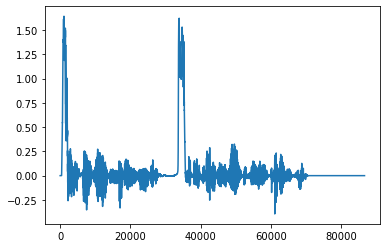

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(generated_wav)
plt.show()